In [152]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [153]:
# Read CSV file
df = pd.read_csv("K means Cars93.csv")

In [154]:
# Selecting a subset of the original dataset
temp1 = df[['Manufacturer', 'Type', 'Price', 'MPG.city', 'MPG.highway','Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile','Fuel.tank.capacity', 'Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room','Weight']]
temp1.head()

,Manufacturer,Type,Price,MPG.city,MPG.highway,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,Acura,Small,15.9,25,31,4,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,Acura,Midsize,33.9,18,25,6,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,Audi,Compact,29.1,20,26,6,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,Audi,Midsize,37.7,19,26,6,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,BMW,Midsize,30.0,22,30,4,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640


In [155]:
# Drop rows which have na values present
temp1 = temp1.dropna(axis=0, how="any")
temp1.shape

In [157]:
# Encode Manufacturer and Type columns into integers
label_encoder = preprocessing.LabelEncoder()
temp1["Manufacturer"] = label_encoder.fit_transform(temp1["Manufacturer"])
temp1["Manufacturer"].unique()

label_encoder = preprocessing.LabelEncoder()
temp1["Type"] = label_encoder.fit_transform(temp1["Type"])
temp1["Type"].unique()

array([3, 2, 0, 1, 4])

In [158]:
# Create a list of clusters with k value ranging from 1 to 10
cluster = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k).fit(temp1)
    cluster.append(kmean.inertia_)

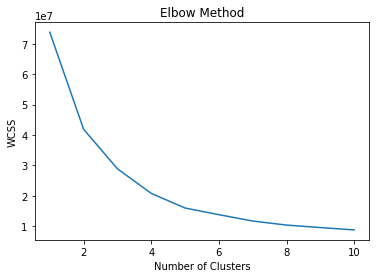

In [159]:
# Create Elbow plot from the list of clusters
plt.plot(range(1,11), cluster)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

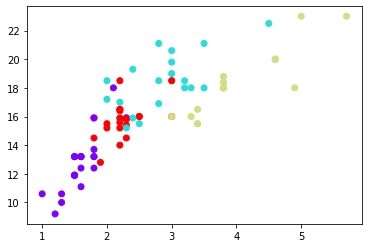

In [161]:
# Choosing k = 4 from elbow plot, plot the cluster plot
kmean=KMeans(n_clusters=4)
kmean.fit(temp1)
identified_clusters = kmean.fit_predict(temp1)
temp1["Predicted Value"] = identified_clusters
plt.scatter(x=temp1["EngineSize"],y=temp1['Fuel.tank.capacity'],c=temp1['Predicted Value'],cmap='rainbow')